# Central Potential

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from IPython.display import Image

### Normalization

In [2]:
def psiNorm(psi, dx):
    N = len(psi)
    psi2 = [psi[i]**2 for i in range(N)]
    psi2arr = np.array(psi2)
    psimod2 = np.sum(psi2arr*dx)
    norm_psi = np.array(psi)/(psimod2)**0.5
    return norm_psi

In [3]:
# checking normalization
arr2 = np.arange(2, 12, 1e-2)
arr2n = psiNorm(arr2, 1e-2)
np.sum(arr2n**2 *1e-2)

1.0

Wavefunction

In [4]:
def Psi(mhdx2, psi, Vi, E):
    N = len(psi)
    psiE = [psi[i] for i in range(N)]
    for i in range(2,N):
        psiE[i] = 2*(mhdx2*(Vi[i]-E) +1)* psiE[i-1] - psiE[i-2]
    return psiE

Normalization

In [5]:
def psiNorm(psi, dx):
    N = len(psi)
    psi2 = [psi[i]**2 for i in range(N)]
    psi2arr = np.array(psi2)
    psimod2 = np.sum(psi2arr*dx)
    norm_psi = np.array(psi)/(psimod2)**0.5
    return norm_psi

Solving by central difference method

In [6]:

def CntDiffSchr(mhdx2, Vi, psi0, psi1, psiN, nodes, tol, mxItr):
        N = len(Vi)-1
        Emx = max(Vi)
        Emn = min(Vi)
       
        psiIn = [0 for i in range(N+1)]
        
        psiIn[0], psiIn[1], psiIn[N] = psi0, psi1, psiN
        itr = 0
        while abs(Emx-Emn) > tol and itr < mxItr:
            E = 0.5*(Emx+Emn)
            psi = Psi(mhdx2,psiIn,Vi,E)  # Get wavefunction
            
            cnt = 0
            for i in range(1,N-2):
                if psi[i]*psi[i+1] <0:
                    cnt += 1
            if cnt > nodes:
                Emx = E
            elif cnt < nodes:
                Emn = E
            else:
                if psi[N-1] >psiN:
                    Emn = E
                elif psi[N-1] < psiN:
                    Emx = E

            itr += 1
        if itr < mxItr :
            return E, psi
        else:
            return None, None

### Problem
Solution of the equation,
$$ \frac{d^2y}{dr^2} = \frac{2m}{\hbar^2} \, (V(r)-E) \,y $$
where the potential is,
$$ V(r) = -\frac{e^2}{r} \, \exp(-r/a) $$

In [7]:
import matplotlib.pyplot as plt
def V(e2, r):
    a = 7.5
    return  -e2/r * np.exp(-r/a)
hbar, m = 0.1, 1
e2 = 0.01

dr = 0.005
tol = 1e-6
mxItr = 100
psi0, psiN = 0, 0

C:\Users\suman\AppData\Local\Temp\ipykernel_14524\2531665682.py:16: RuntimeWarning: overflow encountered in double_scalars
  if psi[i]*psi[i+1] <0:
C:\Users\suman\AppData\Local\Temp\ipykernel_14524\614218990.py:5: RuntimeWarning: overflow encountered in double_scalars
  psiE[i] = 2*(mhdx2*(Vi[i]-E) +1)* psiE[i-1] - psiE[i-2]
C:\Users\suman\AppData\Local\Temp\ipykernel_14524\614218990.py:5: RuntimeWarning: invalid value encountered in double_scalars
  psiE[i] = 2*(mhdx2*(Vi[i]-E) +1)* psiE[i-1] - psiE[i-2]


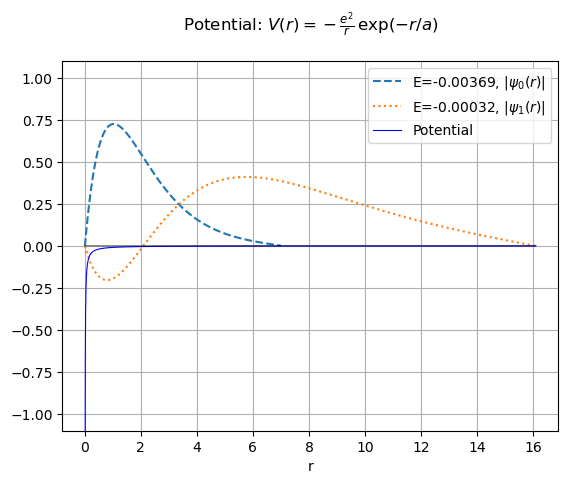

In [8]:
R0, RN = 1e-4, [7.0,16.1]
stln=['--',':','-']

for nodes in range(2):
    N = int((RN[nodes]-R0)/dr)
    dr = (RN[nodes]-R0)/N
    mhdr2 = m*dr**2/hbar**2
    r = [R0+i*dr for i in range(N+1)]
    Vi = [V(e2,r[i]) for i in range(N+1)]
    psi1 = (-1)**nodes*1e-4
    E, psi = CntDiffSchr(mhdr2,Vi,psi0,psi1,psiN,nodes,tol,mxItr)
    if E != None:
        psin = [0 for i in range(N+1)]
        psi = psiNorm(psi,dr)
   
        plt.plot(r, psi,stln[nodes],label=f'E={E:.5f}, $|\psi_{nodes}(r)|$')
    
plt.ylim(-1.1,1.1)
plt.plot(r,Vi,'b', lw=0.8, label='Potential')
xax = [0 for i in range(N+1)]
plt.plot(r,xax,'k', lw=0.5)
plt.xlabel('r')
plt.legend()
plt.title('Potential: $V(r) = -\\frac{e^2}{r} \, \exp(-r/a)$\n')
plt.grid()
plt.show()

## Finite Potential well

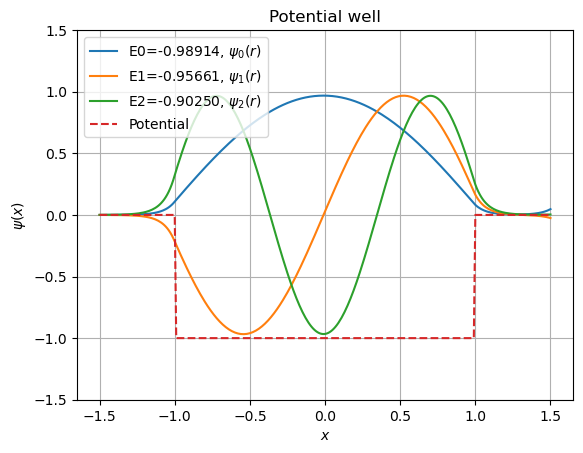

In [19]:
def V(x):
    l0, l1, V0 = -1, 1, -1
    if l0<x and x<l1:
        pot = V0
    else:
        pot = 0
    return pot
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2

dx = 1e-2
tol = 1e-6
mxitr = 100
x0, psi0, xN, psiN = -1.5, 0, 1.5, 0

N = int((xN-x0)/dx)
dx = (xN-x0)/N
mhdx2 = m*dx**2/hbar**2
x = [x0+i*dx for i in range(N+1)]
Vi = [V(x[i]) for i in range(N+1)]

for nodes in range(3):
    psi1 = (-1)**nodes*1e-4
    E, psi = CntDiffSchr(mhdx2,Vi,psi0,psi1,psiN,nodes,tol,mxItr)
    if E != None:
        psi = psiNorm(psi,dx)
        plt.plot(x, psi,label=f'E{nodes+1}={E:.5f}, $\psi_{nodes+1}(r)$')
        # plt.plot(x, np.abs(psi)**2,label=f'E{nodes}={E:.5f}, $|\psi_{nodes}(r)|^2$')

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,1.5)
plt.plot(x, Vi, '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential well')
plt.grid()
plt.show()

## Infinite potential well

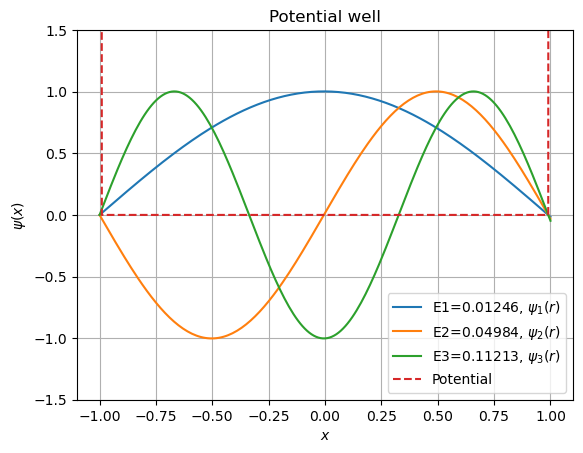

In [21]:
def V(x):
    l0, l1, V0 = -1, 1, 50
    if l0<x and x<l1:
        pot = 0
    else:
        pot = V0
    return pot
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2

dx = 1e-2
tol = 1e-6
mxitr = 100
x0, psi0, xN, psiN = -1, 0, 1, 0

N = int((xN-x0)/dx)
dx = (xN-x0)/N
mhdx2 = m*dx**2/hbar**2
x = [x0+i*dx for i in range(N+1)]
Vi = [V(x[i]) for i in range(N+1)]

for nodes in range(3):
    psi1 = (-1)**nodes*1e-4
    E, psi = CntDiffSchr(mhdx2,Vi,psi0,psi1,psiN,nodes,tol,mxItr)
    if E != None:
        psi = psiNorm(psi,dx)
        plt.plot(x, psi,label=f'E{nodes+1}={E:.5f}, $\psi_{nodes+1}(r)$')
        # plt.plot(x, np.abs(psi)**2,label=f'E{nodes}={E:.5f}, $|\psi_{nodes}(r)|^2$')

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,1.5)
plt.plot(x, Vi, '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential well')
plt.grid()
plt.show()

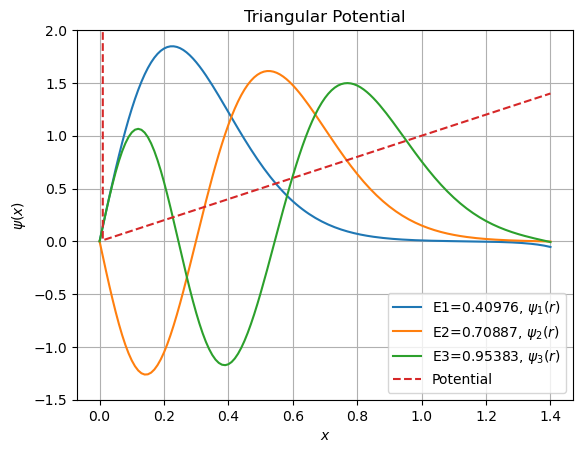

In [28]:
def V(x):
    a, V0 = 1, 1000
    if x <= 0:
        pot = V0
    else:
        pot = a*x
    return pot
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2

dx = 1e-2
tol = 1e-6
mxitr = 100
x0, psi0, xN, psiN = 0, 0, 1.4, 0

N = int((xN-x0)/dx)
dx = (xN-x0)/N
mhdx2 = m*dx**2/hbar**2
x = [x0+i*dx for i in range(N+1)]
Vi = [V(x[i]) for i in range(N+1)]

for nodes in range(3):
    psi1 = (-1)**nodes*1e-4
    E, psi = CntDiffSchr(mhdx2,Vi,psi0,psi1,psiN,nodes,tol,mxItr)
    if E != None:
        psi = psiNorm(psi,dx)
        plt.plot(x, psi,label=f'E{nodes+1}={E:.5f}, $\psi_{nodes+1}(r)$')
        # plt.plot(x, np.abs(psi)**2,label=f'E{nodes}={E:.5f}, $|\psi_{nodes}(r)|^2$')

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,2)
plt.plot(x, Vi, '--', label='Potential')
plt.legend(loc='best')
plt.title('Triangular Potential')
plt.grid()
plt.show()